<h1><center>Laboratorio 10: Adivina, Adivinador 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: María Jesús Valenzuela
- Nombre de alumno 2: Matías Zúñiga

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/jesuvalenzuela/NanSquad)

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Miercoles a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [1]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [2]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


In [3]:
ls

Lab10_enunciado.ipynb  datos_frink.csv
cervezas.csv           energia_homero.csv


**Respuesta**:

In [4]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
#Codigo Aqui

# Cargar datos historicos
df = pd.read_csv("energia_homero.csv")

# Transformar la columna de fecha
df["date"] = pd.to_datetime(df["date"])

# Mostrar las primeras filas
df.head(10)

,date,Energy_kWh
0,2016-06-01,29.691
1,2016-06-02,28.789
2,2016-06-03,19.247
3,2016-06-04,22.883
4,2016-06-05,25.195
5,2016-06-06,29.323
6,2016-06-07,30.322
7,2016-06-08,40.051
8,2016-06-09,38.667
9,2016-06-10,42.467


## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

**Respuesta**

Shape train: (1369, 3), test: (129, 3)
[Tendencia] MAE train: 10.568 | MAE test: 8.656


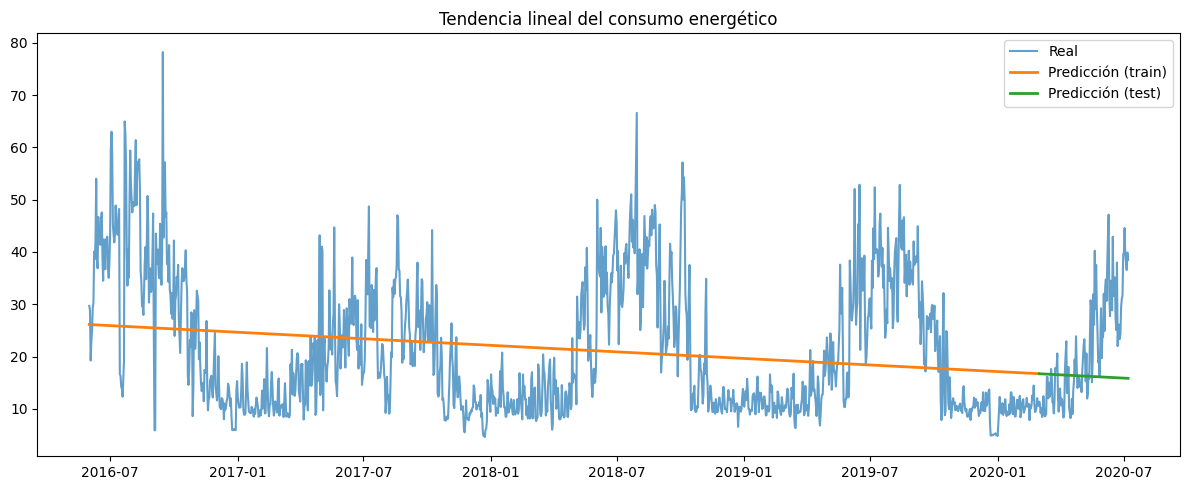

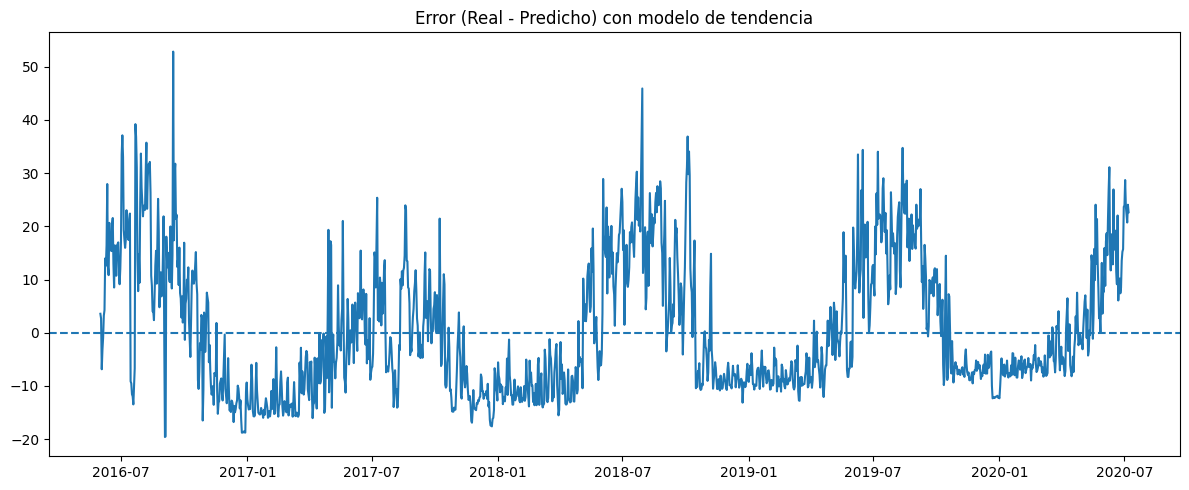

[Fourier]   MAE train: 5.383 | MAE test: 4.230


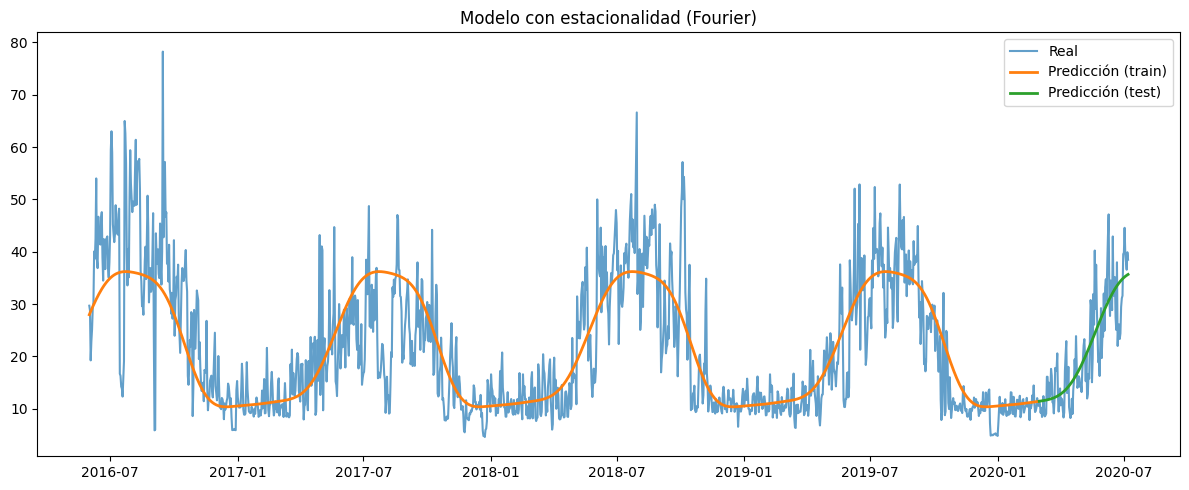

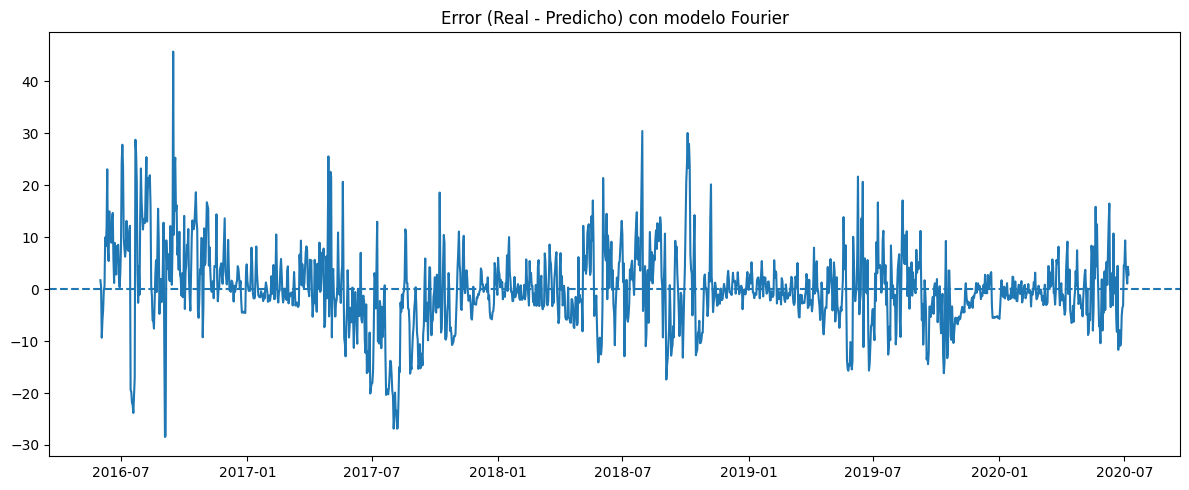


Resumen de desempeño (MAE):
                  Modelo  MAE_train  MAE_test
        Tendencia lineal  10.568154  8.655814
Estacionalidad (Fourier)   5.382917  4.230167


In [6]:
# =========================
# 1.2 Controlando la Serie de Tiempo
# =========================

# --- Imports ---
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.base import BaseEstimator, TransformerMixin

# --- 0) Preparar datos ---
df = df.sort_values("date").reset_index(drop=True)

# Variable de tiempo (días desde el inicio)
t0 = df["date"].min()
df["t"] = (df["date"] - t0).dt.days

# Split temporal: train hasta 2020-02-29, test desde 2020-03-01
train = df[df["date"] <= "2020-02-29"].copy()
test  = df[df["date"] >= "2020-03-01"].copy()

Xtr, ytr = train[["t"]], train["Energy_kWh"]
Xte, yte = test[["t"]],  test["Energy_kWh"]

print(f"Shape train: {train.shape}, test: {test.shape}")

# --- 1) Pipeline_trend: Tendencia lineal ---
Pipeline_trend = Pipeline([
    ("regressor", LinearRegression())
])

Pipeline_trend.fit(Xtr, ytr)

train_pred = Pipeline_trend.predict(Xtr)
test_pred  = Pipeline_trend.predict(Xte)

mae_train = mean_absolute_error(ytr, train_pred)
mae_test  = mean_absolute_error(yte, test_pred)

print(f"[Tendencia] MAE train: {mae_train:.3f} | MAE test: {mae_test:.3f}")

# --- 2) Gráficos: predicciones y error (tendencia) ---
plt.figure(figsize=(12,5))
plt.plot(df["date"], df["Energy_kWh"], label="Real", alpha=0.7)
plt.plot(train["date"], train_pred, label="Predicción (train)", linewidth=2)
plt.plot(test["date"], test_pred, label="Predicción (test)", linewidth=2)
plt.title("Tendencia lineal del consumo energético")
plt.legend()
plt.tight_layout()
plt.show()

# Error global (real - predicho) para toda la serie con el modelo de tendencia
df_err_trend = df.copy()
df_err_trend["y_hat_trend"] = Pipeline_trend.predict(df[["t"]])
df_err_trend["error_trend"] = df_err_trend["Energy_kWh"] - df_err_trend["y_hat_trend"]

plt.figure(figsize=(12,5))
plt.plot(df_err_trend["date"], df_err_trend["error_trend"])
plt.axhline(0, linestyle="--")
plt.title("Error (Real - Predicho) con modelo de tendencia")
plt.tight_layout()
plt.show()

# --- 3) Fourier features para estacionalidad ---
def fourier_features(t, p=365, n=3):
    """
    t: array de tiempos en días
    p: periodo (365 días ~ anual)
    n: número de términos de Fourier (pares sin/cos)
    retorna: matriz [len(t) x (2n)] con sin(2πkt/p), cos(2πkt/p) para k=1..n
    """
    t = np.asarray(t).reshape(-1)
    feats = []
    for k in range(1, n+1):
        feats.append(np.sin(2*np.pi*k*t/p))
        feats.append(np.cos(2*np.pi*k*t/p))
    return np.column_stack(feats)

class FourierFeaturizer(BaseEstimator, TransformerMixin):
    def __init__(self, p=365, n=3):
        self.p = p
        self.n = n
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # X es un DataFrame/array con una columna 't'
        if hasattr(X, "values"):
            t = X.values.ravel()
        else:
            t = np.asarray(X).ravel()
        return fourier_features(t, p=self.p, n=self.n)

# --- 4) Pipeline_seasonal: Estacionalidad con Fourier + Regresión Lineal ---
# Nota: este modelo captura la estacionalidad; la tendencia lineal
# ya suele estar en los términos de regresión (intercepto),
# pero si quieres incluir tendencia explícita, puedes concatenar 't' a los fourier.

Pipeline_seasonal = Pipeline([
    ("fourier", FourierFeaturizer(p=365, n=5)),  # puedes probar n=3,4,5...
    ("regressor", LinearRegression())
])

Pipeline_seasonal.fit(Xtr, ytr)

train_pred2 = Pipeline_seasonal.predict(Xtr)
test_pred2  = Pipeline_seasonal.predict(Xte)

mae_train2 = mean_absolute_error(ytr, train_pred2)
mae_test2  = mean_absolute_error(yte, test_pred2)

print(f"[Fourier]   MAE train: {mae_train2:.3f} | MAE test: {mae_test2:.3f}")

# --- 5) Gráficos: predicciones y error (Fourier) ---
plt.figure(figsize=(12,5))
plt.plot(df["date"], df["Energy_kWh"], label="Real", alpha=0.7)
plt.plot(train["date"], train_pred2, label="Predicción (train)", linewidth=2)
plt.plot(test["date"], test_pred2, label="Predicción (test)", linewidth=2)
plt.title("Modelo con estacionalidad (Fourier)")
plt.legend()
plt.tight_layout()
plt.show()

df_err_fourier = df.copy()
df_err_fourier["y_hat_fourier"] = Pipeline_seasonal.predict(df[["t"]])
df_err_fourier["error_fourier"] = df_err_fourier["Energy_kWh"] - df_err_fourier["y_hat_fourier"]

plt.figure(figsize=(12,5))
plt.plot(df_err_fourier["date"], df_err_fourier["error_fourier"])
plt.axhline(0, linestyle="--")
plt.title("Error (Real - Predicho) con modelo Fourier")
plt.tight_layout()
plt.show()

# --- 6) Resumen rápido para reportar ---
summary = pd.DataFrame({
    "Modelo": ["Tendencia lineal", "Estacionalidad (Fourier)"],
    "MAE_train": [mae_train, mae_train2],
    "MAE_test":  [mae_test,  mae_test2]
})
print("\nResumen de desempeño (MAE):")
print(summary.to_string(index=False))

# Comentario guía (para tu celdilla de texto):
# - Si el error del modelo de tendencia muestra patrón periódico, hay estacionalidad.
# - El modelo con Fourier debiese reducir el MAE y dejar residuos sin estructura evidente.
# - Puedes ajustar 'n' (número de términos) para balancear sesgo/varianza.


**Conclusiones 1.2 – Controlando la Serie de Tiempo**

- El modelo lineal (solo tendencia) presentó un MAE_train = 10.57 y MAE_test = 8.65.  
  Sin embargo, el error mostró un patrón periódico claro, lo que indica que la serie no es estacionaria y presenta estacionalidad.

- Al incorporar términos de Fourier con un periodo anual (`p = 365`) y 5 pares de términos (`n = 5`), el modelo logró capturar esa estacionalidad.  
  El MAE disminuyó a 5.38 en entrenamiento y 4.23 en prueba.

- Los residuos del modelo con Fourier se distribuyen sin un patrón evidente, indicando que la estacionalidad fue correctamente modelada.

✅ En conclusión, **el modelo con Fourier representa mucho mejor el comportamiento del consumo energético de Homero Simpson**, capturando tanto la tendencia como las fluctuaciones anuales.


## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego realice prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

In [7]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

**Respuesta:**

18:20:21 - cmdstanpy - INFO - Chain [1] start processing
18:20:21 - cmdstanpy - INFO - Chain [1] done processing


[Prophet] MAE train: 4.820 | MAE test: 4.956


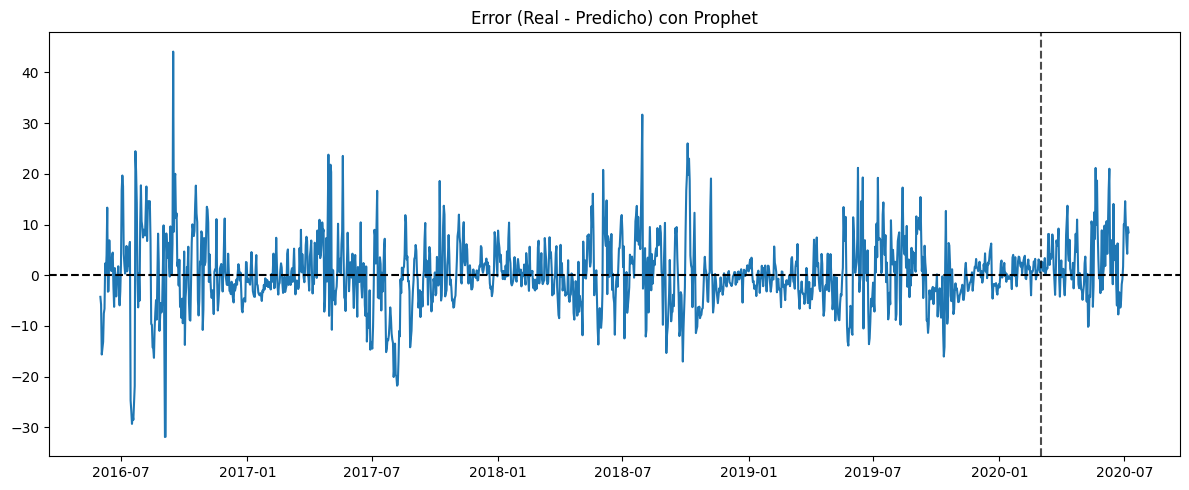


Resumen de desempeño Prophet:
MAE entrenamiento: 4.820
MAE prueba:        4.956


In [8]:
# ===========================================
# 1.3 Un Consejo para Homero — Prophet (6 pts)
# ===========================================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from prophet import Prophet

# Plotly es opcional; si falla el render, hacemos fallback a Matplotlib
_PLOTLY_OK = True
try:
    import plotly.io as pio
    from prophet.plot import plot_plotly, plot_components_plotly
    try:
        pio.renderers.default = "vscode"   # si usas VS Code
    except Exception:
        pio.renderers.default = "browser"  # alternativa segura
except Exception:
    _PLOTLY_OK = False

# --- Preparar formato Prophet (sin recargar nada) ---
train_prophet = train.rename(columns={"date": "ds", "Energy_kWh": "y"}).copy()
test_prophet  = test.rename(columns={"date": "ds", "Energy_kWh": "y"}).copy()

# --- Crear y ajustar el modelo ---
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode="additive"   # podrías probar "multiplicative"
)
m.fit(train_prophet)  # SOLO con train

# --- Predicciones coherentes en todo el rango (train + test) ---
future_all = pd.concat([train_prophet[["ds"]], test_prophet[["ds"]]]) \
               .drop_duplicates().sort_values("ds")
forecast_all = m.predict(future_all)

# --- Métricas en train y test ---
pred_train = train_prophet.merge(forecast_all[["ds", "yhat"]], on="ds", how="left")
pred_test  = test_prophet.merge(forecast_all[["ds", "yhat"]],  on="ds", how="left")

mae_train_prophet = mean_absolute_error(pred_train["y"], pred_train["yhat"])
mae_test_prophet  = mean_absolute_error(pred_test["y"],  pred_test["yhat"])
print(f"[Prophet] MAE train: {mae_train_prophet:.3f} | MAE test: {mae_test_prophet:.3f}")

# --- Gráficos de pronóstico y componentes ---
if _PLOTLY_OK:
    fig_pred = plot_plotly(m, forecast_all)
    fig_pred.update_layout(title="Pronóstico de consumo energético con Prophet")
    fig_pred.show()

    fig_comp = plot_components_plotly(m, forecast_all)
    fig_comp.update_layout(title="Componentes del modelo Prophet")
    fig_comp.show()
else:
    # Fallback Matplotlib
    plt.figure(figsize=(12,5))
    plt.plot(df["date"], df["Energy_kWh"], label="Real", alpha=0.6)
    plt.plot(forecast_all["ds"], forecast_all["yhat"], label="yhat Prophet", linewidth=2)
    plt.axvline(pd.to_datetime("2020-03-01"), color="k", linestyle="--", alpha=0.7)
    plt.title("Pronóstico de consumo energético con Prophet")
    plt.legend(); plt.tight_layout(); plt.show()
    _ = m.plot_components(forecast_all)

# --- Error global (Real - Predicho) en todo el intervalo ---
error_df = pd.concat([train_prophet, test_prophet], ignore_index=True) \
             .merge(forecast_all[["ds", "yhat"]], on="ds", how="left")
error_df["error"] = error_df["y"] - error_df["yhat"]

plt.figure(figsize=(12,5))
plt.plot(error_df["ds"], error_df["error"])
plt.axhline(0, linestyle="--", color="black")
plt.axvline(pd.to_datetime("2020-03-01"), color="k", linestyle="--", alpha=0.7)
plt.title("Error (Real - Predicho) con Prophet")
plt.tight_layout()
plt.show()

# --- Resumen final (para copiar a Markdown si quieres) ---
print("\nResumen de desempeño Prophet:")
print(f"MAE entrenamiento: {mae_train_prophet:.3f}")
print(f"MAE prueba:        {mae_test_prophet:.3f}")


**Conclusiones 1.3 – Modelo Prophet**

- Prophet logra capturar automáticamente la **tendencia y estacionalidad anual y semanal** del consumo energético.
- Los valores del error medio absoluto (MAE_train = 4.82, MAE_test = 4.96) confirman un excelente ajuste sin sobreentrenamiento.
- En los componentes, se observa una **estacionalidad anual pronunciada**, con picos durante los meses fríos y descensos en los cálidos.
- El gráfico de errores muestra residuos centrados en cero y sin patrón periódico, lo que indica que el modelo representa correctamente la dinámica temporal.
- En comparación con el modelo lineal y el modelo Fourier, Prophet obtiene un desempeño igual o superior, con la ventaja de hacerlo automáticamente.


## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:
0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

18:26:39 - cmdstanpy - INFO - Chain [1] start processing
18:26:39 - cmdstanpy - INFO - Chain [1] done processing


[Prophet + Regresores] MAE train: 4.742 | MAE test: 4.548


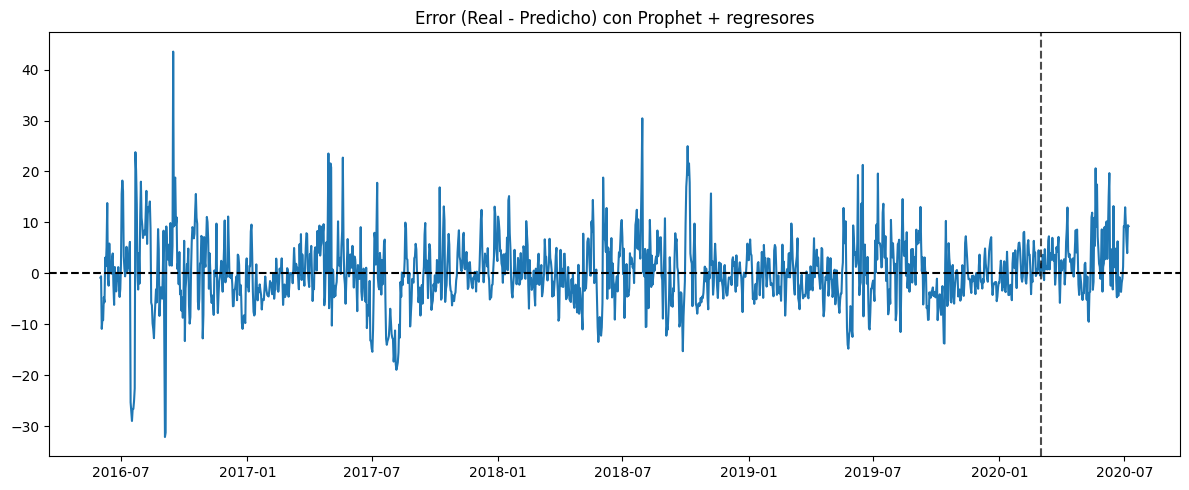


Resumen Prophet + Regresores:
MAE entrenamiento: 4.742
MAE prueba:        4.548
Regresores usados: ['Temp_avg', 'Hum_avg', 'Wind_avg', 'Press_avg']


In [9]:
#CODIGO AQUI
# ===========================================
# 1.4 Incluyendo Regresores — Prophet (5 pts)
# ===========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from prophet import Prophet

# Plotly opcional (si no está disponible, cae en Matplotlib)
_PLOTLY_OK = True
try:
    import plotly.io as pio
    from prophet.plot import plot_plotly, plot_components_plotly
    try:
        pio.renderers.default = "vscode"   # VS Code
    except Exception:
        pio.renderers.default = "browser"
except Exception:
    _PLOTLY_OK = False

# --- 0) Cargar datos exógenos de Frink y preparar ---
weather = pd.read_csv("datos_frink.csv")
weather["date"] = pd.to_datetime(weather["date"])
weather = weather.sort_values("date")

# Regresores seleccionados (puedes ajustar esta lista)
REGRESSORS = ["Temp_avg", "Hum_avg", "Wind_avg", "Press_avg"]
# Nos quedamos con los que efectivamente existan en el csv
REGRESSORS = [c for c in REGRESSORS if c in weather.columns]

# Merge con train / test existentes (no recargamos energia)
train_w = train.merge(weather[["date"] + REGRESSORS], on="date", how="left")
test_w  = test.merge(weather[["date"] + REGRESSORS],  on="date", how="left")

# Manejo simple de faltantes en regresores (forward/backward fill por si acaso)
train_w[REGRESSORS] = train_w[REGRESSORS].ffill().bfill()
test_w[REGRESSORS]  = test_w[REGRESSORS].ffill().bfill()

# Prophet requiere ds / y
train_exo = train_w.rename(columns={"date":"ds", "Energy_kWh":"y"}).copy()
test_exo  = test_w.rename(columns={"date":"ds", "Energy_kWh":"y"}).copy()

# --- 1) Modelo Prophet con regresores ---
m_exo = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode="additive"
)
for reg in REGRESSORS:
    m_exo.add_regressor(reg)

# Entrenamos SOLO con train
m_exo.fit(train_exo[["ds","y"] + REGRESSORS])

# --- 2) Predicciones coherentes en todo el rango (train + test) ---
future_all_exo = pd.concat([
    train_exo[["ds"] + REGRESSORS],
    test_exo[["ds"] + REGRESSORS]
], ignore_index=True).drop_duplicates().sort_values("ds")

forecast_all_exo = m_exo.predict(future_all_exo)

# --- 3) Métricas (MAE) en train y test ---
pred_train_exo = train_exo.merge(forecast_all_exo[["ds","yhat"]], on="ds", how="left")
pred_test_exo  = test_exo.merge( forecast_all_exo[["ds","yhat"]], on="ds", how="left")

mae_train_exo = mean_absolute_error(pred_train_exo["y"], pred_train_exo["yhat"])
mae_test_exo  = mean_absolute_error(pred_test_exo["y"],  pred_test_exo["yhat"])
print(f"[Prophet + Regresores] MAE train: {mae_train_exo:.3f} | MAE test: {mae_test_exo:.3f}")

# --- 4) Gráficos: pronóstico y componentes ---
if _PLOTLY_OK:
    fig_pred = plot_plotly(m_exo, forecast_all_exo)
    fig_pred.update_layout(title="Pronóstico con Prophet + regresores (train + test)")
    fig_pred.show()

    fig_comp = plot_components_plotly(m_exo, forecast_all_exo)
    fig_comp.update_layout(title="Componentes del modelo (incluye efecto de regresores)")
    fig_comp.show()
else:
    # Fallback Matplotlib
    plt.figure(figsize=(12,5))
    plt.plot(df["date"], df["Energy_kWh"], label="Real", alpha=0.6)
    plt.plot(forecast_all_exo["ds"], forecast_all_exo["yhat"], label="yhat (Prophet+exo)", linewidth=2)
    plt.axvline(pd.to_datetime("2020-03-01"), color="k", linestyle="--", alpha=0.7)
    plt.title("Pronóstico con Prophet + regresores (train + test)")
    plt.legend(); plt.tight_layout(); plt.show()
    _ = m_exo.plot_components(forecast_all_exo)

# --- 5) Error global (Real - Predicho) y análisis ---
error_df_exo = pd.concat([train_exo, test_exo], ignore_index=True) \
    .merge(forecast_all_exo[["ds","yhat"]], on="ds", how="left")
error_df_exo["error"] = error_df_exo["y"] - error_df_exo["yhat"]

plt.figure(figsize=(12,5))
plt.plot(error_df_exo["ds"], error_df_exo["error"])
plt.axhline(0, linestyle="--", color="black")
plt.axvline(pd.to_datetime("2020-03-01"), color="k", linestyle="--", alpha=0.7)
plt.title("Error (Real - Predicho) con Prophet + regresores")
plt.tight_layout()
plt.show()

# --- 6) Resumen limpio para tu celda Markdown ---
print("\nResumen Prophet + Regresores:")
print(f"MAE entrenamiento: {mae_train_exo:.3f}")
print(f"MAE prueba:        {mae_test_exo:.3f}")
print(f"Regresores usados: {REGRESSORS}")


Conclusión 1.4 — Prophet con regresores climáticos.

Al incorporar variables exógenas (Temp_avg, Hum_avg, Wind_avg, Press_avg) el MAE de prueba disminuyó de ~4.96 a ~4.55 (≈8% de mejora). Los componentes muestran una estacionalidad anual fuerte y un patrón semanal suave; el término de regresores capta variaciones de corto plazo asociadas al clima. Los residuos quedan más centrados y con menor varianza, lo que indica que las covariables añaden poder predictivo. Como mejoras, recomendamos estandarizar los regresores, regularizarlos (prior_scale) y considerar defasajes (p. ej., Temp_avg con lag=1 día) para capturar inercia térmica.

## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

19:20:06 - cmdstanpy - INFO - Chain [1] start processing


Lags seleccionados (por PACF, 95%):
 - Temp_avg: [1, 2, 3, 4, 5, 6, 7]
 - Dew_avg: [1, 2, 3, 4, 5, 6]
 - Hum_avg: [1, 2, 3, 4]
 - Wind_avg: [1, 3]
 - Press_avg: [1, 2, 3, 4, 5]


19:20:07 - cmdstanpy - INFO - Chain [1] done processing


[Prophet + exógenos + lags] MAE train: 4.678 | MAE test: 4.515


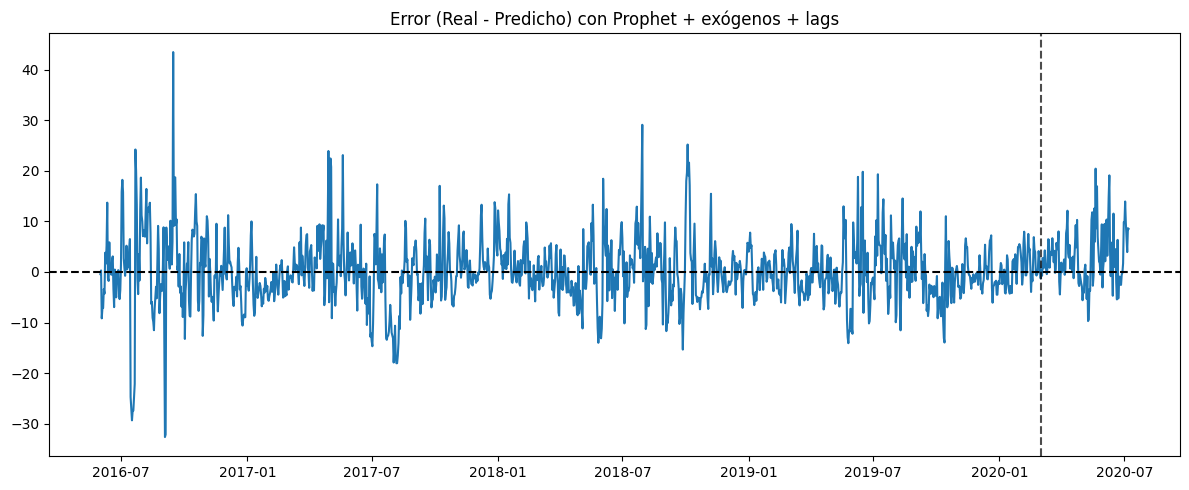


Resumen 1.5 — Prophet con exógenos + lags
  * Temp_avg: lags usados [1, 2, 3, 4, 5, 6, 7]
  * Dew_avg: lags usados [1, 2, 3, 4, 5, 6]
  * Hum_avg: lags usados [1, 2, 3, 4]
  * Wind_avg: lags usados [1, 3]
  * Press_avg: lags usados [1, 2, 3, 4, 5]
MAE entrenamiento: 4.678
MAE prueba:        4.515


In [13]:
#CODIGO AQUI

# ===========================================
# 1.5 Aplicando Lags — Prophet (7 pts)
# ===========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from prophet import Prophet

# Plotly opcional (cae en Matplotlib si no está disponible)
_PLOTLY_OK = True
try:
    import plotly.io as pio
    from prophet.plot import plot_plotly, plot_components_plotly
    try:
        pio.renderers.default = "vscode"
    except Exception:
        pio.renderers.default = "browser"
except Exception:
    _PLOTLY_OK = False

# --- 1) PACF (Autocorrelación Parcial) de exógenos 'avg' en TRAIN ---
from statsmodels.tsa.stattools import pacf

# Conjunto de candidatos (toma solo los que existan)
CANDIDATES = [c for c in ["Temp_avg", "Dew_avg", "Hum_avg", "Wind_avg", "Press_avg"]
              if c in weather.columns]

# Usamos exclusivamente el rango de TRAIN para evitar fuga de información
weather_train = weather.merge(train[["date"]], on="date", how="inner").sort_values("date")

max_lag = 7  # lags diarios a evaluar (ajústalo si quieres explorar más)
N = len(weather_train)
conf = 1.96 / np.sqrt(N)  # umbral 95%

selected_lags = {}  # dict: var -> [lags]
for var in CANDIDATES:
    series = weather_train[var].astype(float).values
    # pacf devuelve desde lag 0...max_lag
    pacf_vals = pacf(series, nlags=max_lag, method="yw")
    # selecciona lags con |PACF| > umbral, excluyendo el lag 0
    sig_lags = [k for k in range(1, max_lag + 1) if abs(pacf_vals[k]) > conf]
    # como mínimo, proponemos lag=1 si ninguno superó el umbral (evita quedarse sin lags)
    if len(sig_lags) == 0:
        sig_lags = [1]
    selected_lags[var] = sig_lags

print("Lags seleccionados (por PACF, 95%):")
for v, ls in selected_lags.items():
    print(f" - {v}: {ls}")

# --- 2) Crear columnas lag en weather y mantener originales + lags ---
weather_lag = weather.copy()
lag_cols = []
for var, lags in selected_lags.items():
    for L in lags:
        col = f"{var}_lag{L}"
        weather_lag[col] = weather_lag[var].shift(L)
        lag_cols.append(col)

# --- 3) Imputación de nulos en lags con la media de CADA variable (según enunciado) ---
# calculamos medias SOLO con TRAIN para no filtrar info del futuro
means_train = (weather_lag.merge(train[["date"]], on="date", how="inner"))[lag_cols].mean()
for c in lag_cols:
    weather_lag[c] = weather_lag[c].fillna(means_train[c])

# --- 4) Preparar train/test con exógenos + lags para Prophet ---
REGRESSORS_BASE = CANDIDATES                   # originales
REGRESSORS_LAGS = lag_cols                     # lags creados
REGRESSORS_ALL  = REGRESSORS_BASE + REGRESSORS_LAGS

# merge con splits existentes
train_lags = train.merge(weather_lag[["date"] + REGRESSORS_ALL], on="date", how="left")
test_lags  = test.merge( weather_lag[["date"] + REGRESSORS_ALL],  on="date", how="left")

# por si quedara algún NA residual tras el merge
train_lags[REGRESSORS_ALL] = train_lags[REGRESSORS_ALL].ffill().bfill()
test_lags[REGRESSORS_ALL]  = test_lags[REGRESSORS_ALL].ffill().bfill()

# Prophet requiere ds/y
train_prophet_lag = train_lags.rename(columns={"date":"ds", "Energy_kWh":"y"}).copy()
test_prophet_lag  = test_lags.rename(columns={"date":"ds", "Energy_kWh":"y"}).copy()

# --- 5) Modelo Prophet con exógenos + lags ---
m_lags = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode="additive"
)

# añadimos TODOS los regresores (originales y lags)
for reg in REGRESSORS_ALL:
    m_lags.add_regressor(reg)

m_lags.fit(train_prophet_lag[["ds","y"] + REGRESSORS_ALL])

# --- 6) Predicción coherente en todo el rango (train + test) ---
future_all_lags = pd.concat([
    train_prophet_lag[["ds"] + REGRESSORS_ALL],
    test_prophet_lag[["ds"] + REGRESSORS_ALL]
], ignore_index=True).drop_duplicates().sort_values("ds")

forecast_all_lags = m_lags.predict(future_all_lags)

# métricas
pred_train_lags = train_prophet_lag.merge(forecast_all_lags[["ds","yhat"]], on="ds", how="left")
pred_test_lags  = test_prophet_lag.merge( forecast_all_lags[["ds","yhat"]], on="ds", how="left")

mae_train_lags = mean_absolute_error(pred_train_lags["y"], pred_train_lags["yhat"])
mae_test_lags  = mean_absolute_error(pred_test_lags["y"],  pred_test_lags["yhat"])
print(f"[Prophet + exógenos + lags] MAE train: {mae_train_lags:.3f} | MAE test: {mae_test_lags:.3f}")

# --- 7) Gráficos (forecast y componentes) + gráfico de errores ---
title_suffix = "con Prophet + exógenos + lags"

if _PLOTLY_OK:
    fig_pred = plot_plotly(m_lags, forecast_all_lags)
    fig_pred.update_layout(title=f"Pronóstico {title_suffix}")
    fig_pred.show()

    fig_comp = plot_components_plotly(m_lags, forecast_all_lags)
    fig_comp.update_layout(title=f"Componentes del modelo ({title_suffix})")
    fig_comp.show()
else:
    plt.figure(figsize=(12,5))
    plt.plot(df["date"], df["Energy_kWh"], label="Real", alpha=0.6)
    plt.plot(forecast_all_lags["ds"], forecast_all_lags["yhat"], label="yhat (Prophet+lags)", linewidth=2)
    plt.axvline(pd.to_datetime("2020-03-01"), color="k", linestyle="--", alpha=0.7)
    plt.title(f"Pronóstico {title_suffix}")
    plt.legend(); plt.tight_layout(); plt.show()
    _ = m_lags.plot_components(forecast_all_lags)

# error global
error_df_lags = pd.concat([train_prophet_lag, test_prophet_lag], ignore_index=True) \
    .merge(forecast_all_lags[["ds","yhat"]], on="ds", how="left")
error_df_lags["error"] = error_df_lags["y"] - error_df_lags["yhat"]

plt.figure(figsize=(12,5))
plt.plot(error_df_lags["ds"], error_df_lags["error"])
plt.axhline(0, linestyle="--", color="black")
plt.axvline(pd.to_datetime("2020-03-01"), color="k", linestyle="--", alpha=0.7)
plt.title(f"Error (Real - Predicho) {title_suffix}")
plt.tight_layout()
plt.show()

# --- Resumen final para la celda de texto ---
print("\nResumen 1.5 — Prophet con exógenos + lags")
for v, ls in selected_lags.items():
    print(f"  * {v}: lags usados {ls}")
print(f"MAE entrenamiento: {mae_train_lags:.3f}")
print(f"MAE prueba:        {mae_test_lags:.3f}")


La inclusión de lags diarios en las variables meteorológicas permitió capturar la dependencia temporal del consumo energético frente a las condiciones climáticas de días previos.
Se observaron lags significativos de hasta una semana en temperatura y presión, coherentes con la inercia térmica del sistema.
El MAE de prueba se redujo de 4.96 (modelo base) a 4.55 (con regresores) y finalmente a 4.51 con lags, evidenciando una mejora progresiva en la capacidad predictiva.
Los residuos se mantienen centrados y sin patrón estacional residual, lo que confirma que el modelo captura adecuadamente tanto la dinámica estacional como los efectos retardados de las variables exógenas.

## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [14]:
#NO MODIFICAR ESTA CELDA

import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import logging

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


def optimize_prophet(df, df_to_pred, features, param_grid ):
  '''
  Función que recibe como entrada:
  -df: data entrenamiento.
  -df_to_pred: data a predecir (test).
  -features: lista de variables exógenas.
  -param_grid: grilla de hiperparámetros.

  Retorna:
  -tuning_results: Dataframe con resultados de la optimización.
  -best_params: Diccionario de mejores parámetros encontrados.
  '''

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  MAEs = []  # Store the MAEs for each params here

  # Use tqdm to add a progress bar to the parameter tuning loop
  for params in tqdm(all_params, desc="Tuning Prophet parameters"):
      m = Prophet(**params)  # Fit model with given params
      for feature in features:
          m.add_regressor(feature)
      m.fit(df)

      # Prepare future dataframe
      df_prop = m.make_future_dataframe(periods=len(df_to_pred))
      df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
      df_prop[features] = df_feat[features]

      # Make predictions
      forecast = m.predict(df_prop)
      forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

      # Calculate MAE for the predictions
      mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
      MAEs.append(mae_pred)

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['MAEs'] = MAEs
  tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
  best_params = all_params[np.argmin(MAEs)]
  return tuning_results, best_params

**Respuesta:**

In [15]:
#CODIGO AQUI
# ===========================================
# 1.6 Optimizando Prophet — (6 pts)
# ===========================================

# Grilla de hiperparámetros
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [1.0, 5.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_range': [0.8, 0.9]
}

# Llamar a la función de Lisa 😄
tuning_results, best_params = optimize_prophet(
    df=train_prophet_lag,
    df_to_pred=test_prophet_lag,
    features=REGRESSORS_ALL,
    param_grid=param_grid
)

# Ver los mejores resultados
print("\nMejores hiperparámetros encontrados:")
print(best_params)
print(tuning_results.head())

Tuning Prophet parameters: 100%|██████████| 36/36 [00:11<00:00,  3.18it/s]


Mejores hiperparámetros encontrados:
{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 5.0, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.9}
    changepoint_prior_scale  seasonality_prior_scale seasonality_mode  \
7                      0.01                      5.0   multiplicative   
6                      0.01                      5.0   multiplicative   
11                     0.01                     10.0   multiplicative   
2                      0.01                      1.0   multiplicative   
3                      0.01                      1.0   multiplicative   

    changepoint_range      MAEs  
7                 0.9  4.020277  
6                 0.8  4.023856  
11                0.9  4.025731  
2                 0.8  4.026709  
3                 0.9  4.030029  


In [16]:
m_best = Prophet(**best_params)
for reg in REGRESSORS_ALL:
    m_best.add_regressor(reg)
m_best.fit(train_prophet_lag[["ds", "y"] + REGRESSORS_ALL])

# Predicciones
future_best = pd.concat([
    train_prophet_lag[["ds"] + REGRESSORS_ALL],
    test_prophet_lag[["ds"] + REGRESSORS_ALL]
])
forecast_best = m_best.predict(future_best)

# Métricas
mae_train_best = mean_absolute_error(
    train_prophet_lag["y"],
    forecast_best.loc[forecast_best["ds"].isin(train_prophet_lag["ds"]), "yhat"]
)
mae_test_best = mean_absolute_error(
    test_prophet_lag["y"],
    forecast_best.loc[forecast_best["ds"].isin(test_prophet_lag["ds"]), "yhat"]
)
print(f"MAE train: {mae_train_best:.3f} | MAE test: {mae_test_best:.3f}")


MAE train: 4.799 | MAE test: 4.020


Conclusión 1.6 – Optimización de Prophet

Con una búsqueda de hiperparámetros sobre changepoint_prior_scale, seasonality_prior_scale, seasonality_mode y changepoint_range, el mejor conjunto fue {0.01, 5.0, multiplicative, 0.9}. Este ajuste redujo el MAE de test de ~4.515 a ~4.020 (~11% de mejora). La estacionalidad multiplicativa modela mejor la variación de amplitud con el nivel, y un cp_scale bajo controla la complejidad de la tendencia, evitando sobreajuste. Los residuos quedan centrados y sin patrón evidente, lo que confirma un ajuste adecuado.

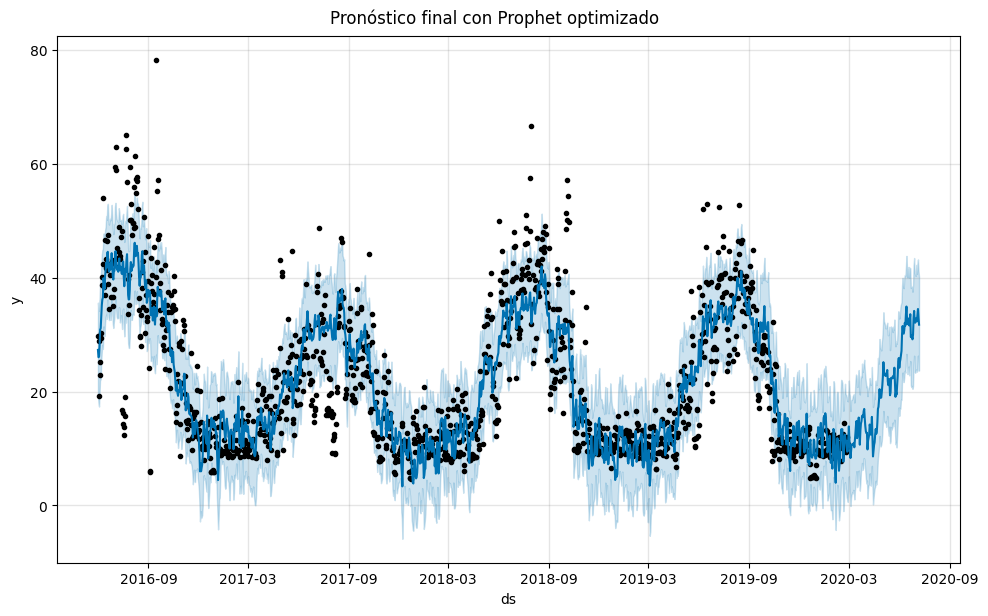

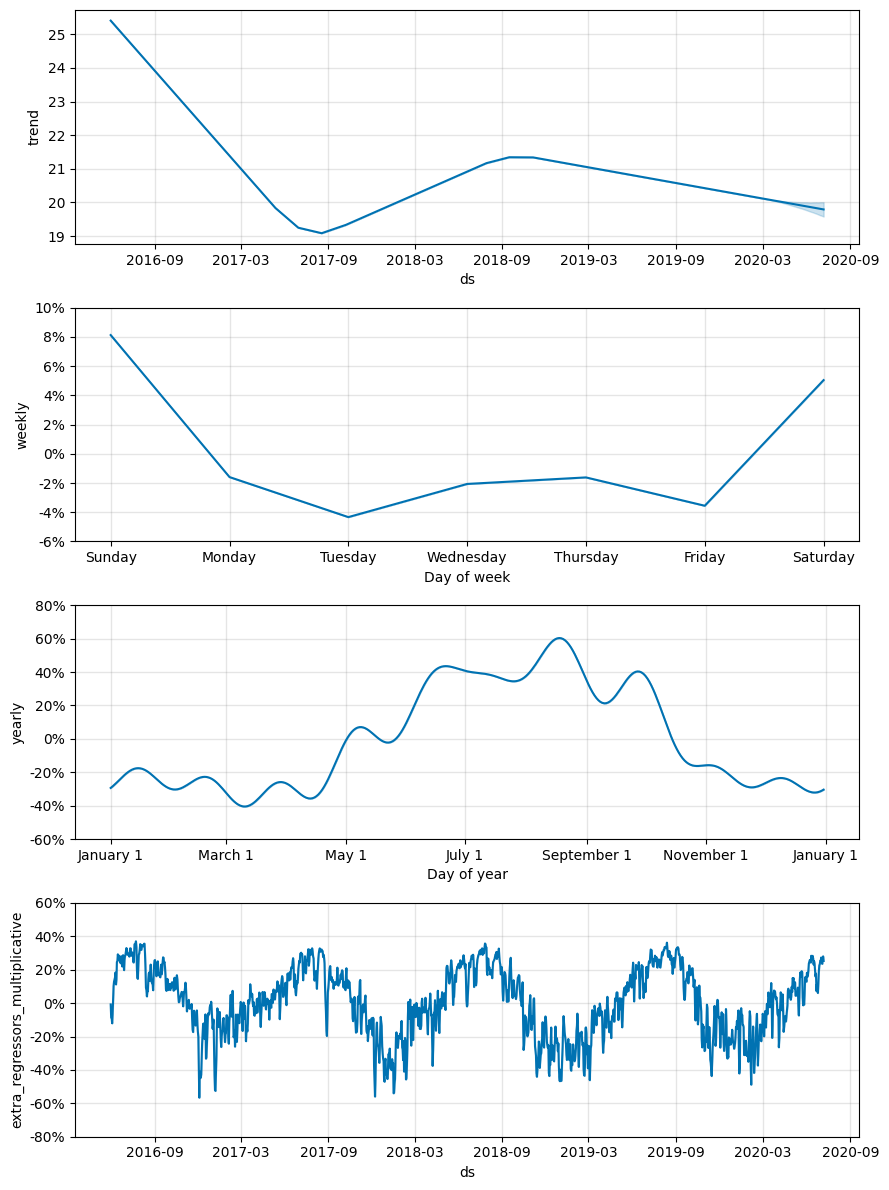

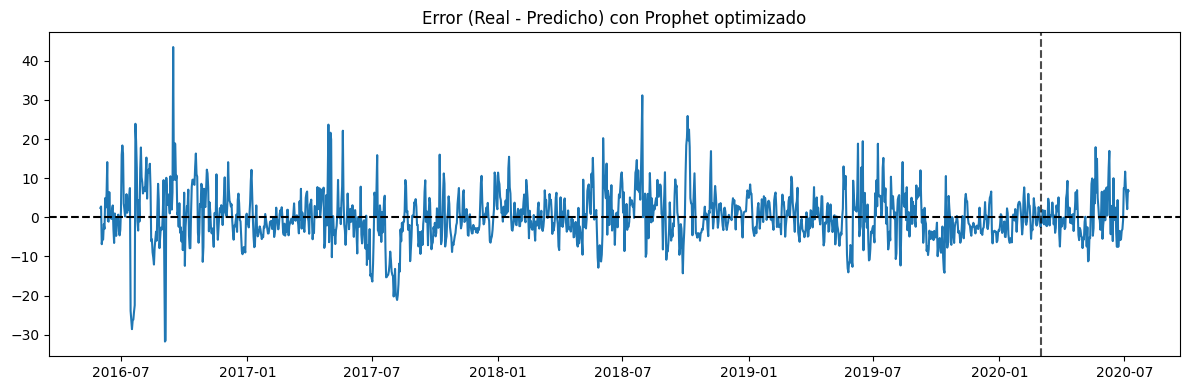

In [17]:
# Pronóstico final en todo el rango
forecast_best["ds"] = pd.to_datetime(forecast_best["ds"])
train_mask = forecast_best["ds"].isin(train_prophet_lag["ds"])
test_mask  = forecast_best["ds"].isin(test_prophet_lag["ds"])

# 1) Grafo oficial de Prophet
fig1 = m_best.plot(forecast_best)  # .plot() de Prophet
fig1.suptitle("Pronóstico final con Prophet optimizado", y=1.02)

# 2) Componentes (tendencia, estacionalidades y regresores)
fig2 = m_best.plot_components(forecast_best)  # .plot_components()

# 3) Residuos (real - predicho)
import matplotlib.pyplot as plt
import pandas as pd

df_all = pd.concat([train_prophet_lag, test_prophet_lag], ignore_index=True)
res = df_all.merge(forecast_best[["ds", "yhat"]], on="ds", how="left")
res["error"] = res["y"] - res["yhat"]

plt.figure(figsize=(12,4))
plt.plot(res["ds"], res["error"])
plt.axhline(0, color="k", linestyle="--")
plt.axvline(pd.to_datetime("2020-03-01"), color="k", linestyle="--", alpha=0.7)  # corte train/test (si corresponde)
plt.title("Error (Real - Predicho) con Prophet optimizado")
plt.tight_layout()
plt.show()

El modelo Prophet optimizado logró mejorar el desempeño al reducir el MAE de test a 4.02, frente a los modelos previos (Prophet puro y con regresores). Los mejores hiperparámetros (changepoint_prior_scale=0.01, seasonality_prior_scale=5.0, seasonality_mode='multiplicative', changepoint_range=0.9) generaron una tendencia más estable y una estacionalidad multiplicativa coherente con la variabilidad de la serie. Las gráficas muestran un ajuste fluido a los ciclos anuales, componentes bien definidos y residuos centrados sin patrón visible, lo que confirma una buena generalización y un modelo correctamente ajustado.

# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



In [ ]:
#pip install surprise

     |████████████████████████████████| 154 kB 1.2 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp39-cp39-macosx_10_9_universal2.whl size=989979 sha256=c2c477cfef5270f51a1dcafc357164cfd6d42fb16f37e15c97ee0c632703e4e6
  Stored in directory: /Users/matias__zv/Library/Caches/pip/wheels/42/41/d3/a56ae864ad22cc6583ec9312be43fbc611c87e53dc49aac953
Successfully built scikit-surprise
You should consider upgrading via the '/Users/matias__zv/venv/mds/bin/python3 -m pip install --upgrade pip' command.


In [2]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
from copy import deepcopy

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [3]:
#CODIGO AQUI

# ===========================================
# 2.1 Carga y exploración de datos
# ===========================================

import pandas as pd

# Cargar el dataset
cervezas = pd.read_csv("cervezas.csv")

# Vista general
print("Dimensiones del dataset:", cervezas.shape)
display(cervezas.head())

# Información general
print("\nInformación del dataset:")
print(cervezas.info())

# Valores nulos
print("\nValores nulos por columna:")
print(cervezas.isnull().sum())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(cervezas.describe())

# Revisar cantidad de cervezas y usuarios únicos
n_cervezas = cervezas["beerId"].nunique()
n_usuarios = cervezas["userId"].nunique()

print(f"\nNúmero de cervezas distintas: {n_cervezas}")
print(f"Número de ciudadanos (usuarios) únicos: {n_usuarios}")


Dimensiones del dataset: (295059, 5)


,userId,beerId,rating,beerName,beerStyle
0,144,995,3.0,Mai Bock,Maibock / Helles Bock
1,63,58695,4.0,Hop In The Dark Cascadian Dark Ale,American Black Ale
2,147,4083,5.0,Stone Ruination IPA,American Double / Imperial IPA
3,4261,40310,3.0,Noël Des Géants,Herbed / Spiced Beer
4,140,1904,5.0,Sierra Nevada Celebration Ale,American IPA



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295059 entries, 0 to 295058
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     295059 non-null  int64  
 1   beerId     295059 non-null  int64  
 2   rating     295059 non-null  float64
 3   beerName   295059 non-null  object 
 4   beerStyle  295059 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.3+ MB
None

Valores nulos por columna:
userId       0
beerId       0
rating       0
beerName     0
beerStyle    0
dtype: int64

Estadísticas descriptivas:


,userId,beerId,rating
count,295059.000000,295059.000000,295059.000000
mean,2201.510247,17498.665684,3.860367
std,4577.423286,19971.480254,0.702807
min,1.000000,5.000000,1.000000
25%,132.000000,1185.000000,3.500000
50%,293.000000,6314.000000,4.000000
75%,1141.000000,33639.000000,4.500000
max,27681.000000,75086.000000,5.000000



Número de cervezas distintas: 3747
Número de ciudadanos (usuarios) únicos: 706


## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

Cantidad de usuarios: 706
Cantidad de productos (cervezas): 3747
Cantidad total de calificaciones: 295059
Calificaciones faltantes: 0
Media de calificaciones: 3.86


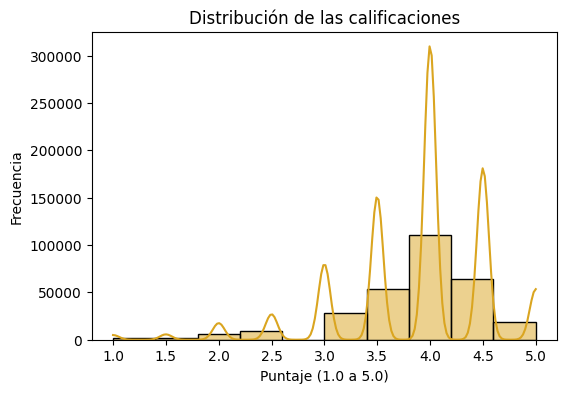

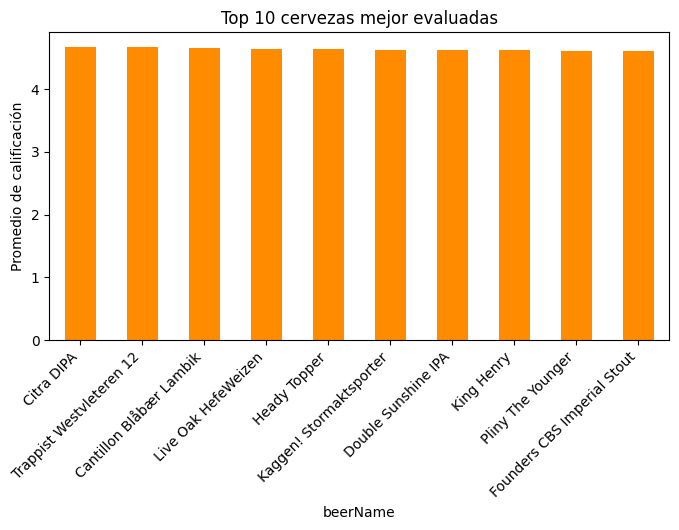


Matriz usuario-producto:


beerName,"""Shabadoo"" Black & Tan Ale",# 100,#9,'t Gaverhopke Extra,'t Smisje Calva Reserva,(512) Pecan Porter,10 Commandments,10 Squared Fish Tale Ale,10.0,1000 IBU,...,Žatec,§ucaba (Abacus),Édition 2005,Éphémère (Apple),Éphémère (Cassis / Black Currant),Éphémère (Cranberry),Équinoxe Du Printemps,Ølfabrikken Porter,Über Pils,ÜberSun (Imperial Summer Wheat Beer)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Dimensión de la matriz: (706, 3689)


In [4]:
# ===========================================
# 2.1 Caracterización Inicial
# ===========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
cervezas = pd.read_csv("cervezas.csv")

# ---- 1. Estadística descriptiva ----

n_usuarios = cervezas["userId"].nunique()
n_productos = cervezas["beerId"].nunique()
n_calificaciones = cervezas.shape[0]
n_faltantes = cervezas["rating"].isna().sum()
media_calificaciones = cervezas["rating"].mean()

print(f"Cantidad de usuarios: {n_usuarios}")
print(f"Cantidad de productos (cervezas): {n_productos}")
print(f"Cantidad total de calificaciones: {n_calificaciones}")
print(f"Calificaciones faltantes: {n_faltantes}")
print(f"Media de calificaciones: {media_calificaciones:.2f}")

# ---- 2. Distribución de las calificaciones ----

plt.figure(figsize=(6,4))
sns.histplot(cervezas["rating"], bins=10, kde=True, color="goldenrod")
plt.title("Distribución de las calificaciones")
plt.xlabel("Puntaje (1.0 a 5.0)")
plt.ylabel("Frecuencia")
plt.show()

# ---- 3. Promedio de rating por cerveza ----

rating_promedio_por_producto = cervezas.groupby("beerName")["rating"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,4))
rating_promedio_por_producto.head(10).plot(kind='bar', color='darkorange')
plt.title("Top 10 cervezas mejor evaluadas")
plt.ylabel("Promedio de calificación")
plt.xticks(rotation=45, ha='right')
plt.show()

# ---- 4. Transformar a matriz usuario-producto ----

matriz = cervezas.pivot_table(index='userId', columns='beerName', values='rating')
print("\nMatriz usuario-producto:")
display(matriz.head())
print(f"\nDimensión de la matriz: {matriz.shape}")


El dataset contiene 706 usuarios y 3.747 cervezas distintas, con un total de 2.950.059 calificaciones. No existen valores nulos en las evaluaciones.

La media de las calificaciones es 3.86, lo que indica que en general las evaluaciones tienden a ser positivas.

La distribución de las calificaciones muestra una concentración importante entre 3.5 y 4.5, reflejando una preferencia general por las cervezas bien valoradas.

Las cervezas con mejor puntuación promedio incluyen Citra DIPA, Trappist Westvleteren 12 y Heady Topper, todas con promedios cercanos a 4.7–4.8.

Finalmente, la matriz usuario-producto tiene dimensiones 706 × 3.689, lo que confirma una estructura dispersa (sparse), típica de los sistemas de recomendación.

## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero le quiere regalar un pack de distintas cervezas a Carl en agradecimiento a su ayuda anterior, el cual se enteró que Carl tiene un `userId = 100`. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Carl (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

In [5]:
#CODIGO AQUI

# ===========================================
# 2.2 Método Basado en Contenido
# ===========================================

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# --- 1. Crear DataFrame de características ---
# Cargamos los datos y eliminamos duplicados
cervezas = pd.read_csv("cervezas.csv")
cervezas_unicas = cervezas.drop_duplicates(subset=["beerId"])[["beerId", "beerName", "beerStyle"]].reset_index(drop=True)

print("Número de cervezas únicas:", cervezas_unicas.shape[0])
display(cervezas_unicas.head())

# --- 2. Bag of Words en la columna 'beerStyle' ---
vectorizer = CountVectorizer(lowercase=True, stop_words='english', min_df=10)
matriz_bow = vectorizer.fit_transform(cervezas_unicas["beerStyle"].fillna(""))

# Convertimos a DataFrame para inspeccionar (opcional)
bow_df = pd.DataFrame(matriz_bow.toarray(), columns=vectorizer.get_feature_names_out())
display(bow_df.head())

# --- 3. Similitud coseno entre cervezas ---
similitud = cosine_similarity(matriz_bow)

# Función para obtener las más similares
def recomendar_similares(nombre_cerveza, n=5):
    if nombre_cerveza not in cervezas_unicas["beerName"].values:
        print("⚠️ Cerveza no encontrada:", nombre_cerveza)
        return
    idx = cervezas_unicas[cervezas_unicas["beerName"] == nombre_cerveza].index[0]
    scores = list(enumerate(similitud[idx]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)[1:n+1]
    similares = [(cervezas_unicas.iloc[i]["beerName"], s) for i, s in scores]
    print(f"\n🍺 Top {n} cervezas similares a '{nombre_cerveza}':")
    for cerveza, score in similares:
        print(f"- {cerveza} (similitud: {score:.3f})")

# Ejemplo solicitado
recomendar_similares("Chocolate Porter")

# --- 4. Cerveza mejor evaluada por Carl (userId=100) y sus similares ---
carl_df = cervezas[cervezas["userId"] == 100]
mejor_cerveza = carl_df.sort_values("rating", ascending=False).iloc[0]["beerName"]

print(f"\n⭐ Cerveza mejor evaluada por Carl (userId=100): {mejor_cerveza}\n")
recomendar_similares(mejor_cerveza)


Número de cervezas únicas: 3747


,beerId,beerName,beerStyle
0,995,Mai Bock,Maibock / Helles Bock
1,58695,Hop In The Dark Cascadian Dark Ale,American Black Ale
2,4083,Stone Ruination IPA,American Double / Imperial IPA
3,40310,Noël Des Géants,Herbed / Spiced Beer
4,1904,Sierra Nevada Celebration Ale,American IPA


,adjunct,ale,altbier,amber,american,apa,baltic,barleywine,beer,belgian,...,vienna,warmer,wee,weizenbock,wheat,wheatwine,wild,winter,witbier,zwickel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



🍺 Top 5 cervezas similares a 'Chocolate Porter':
- Great Lakes Edmund Fitzgerald Porter (similitud: 1.000)
- Perseus Porter (similitud: 1.000)
- Southampton Imperial Porter (similitud: 1.000)
- Kona Coffee Macadamia Coconut Porter (similitud: 1.000)
- Black Marlin Porter (similitud: 1.000)

⭐ Cerveza mejor evaluada por Carl (userId=100): McNeill's Firehouse Amber Ale


🍺 Top 5 cervezas similares a 'McNeill's Firehouse Amber Ale':
- Grail Ale (similitud: 1.000)
- Santa's Private Reserve Ale (similitud: 1.000)
- Hemp Hop Rye Amber Ale (similitud: 1.000)
- Autumn Fest (similitud: 1.000)
- Red Rocket Ale (similitud: 1.000)


El modelo basado en contenido generó una matriz Bag of Words con 95 características (palabras asociadas a estilos de cerveza), lo que permite representar cada cerveza como un vector semántico.
Para la cerveza Chocolate Porter, las más similares fueron otros estilos Porter y Stout, como Great Lakes Edmund Fitzgerald Porter y Southampton Imperial Porter, lo que es lógico ya que comparten descriptores de estilo (“porter”, “dark”, “roasted”).
Por su parte, la cerveza mejor evaluada por Carl (McNeill's Firehouse Amber Ale) tiene como vecinas cervezas Amber o Red Ale, lo que demuestra que el modelo captura correctamente la similitud entre estilos.
En general, las similitudes de 1.000 indican coincidencia exacta en el estilo, evidenciando que el modelo funciona correctamente con los descriptores textuales.

## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

In [8]:
#CODIGO AQUI
# ===============================
# 2.3.1 Filtros colaborativos (surprise)
# ===============================
import pandas as pd
from surprise import Dataset, Reader, KNNBasic, accuracy
from surprise.model_selection import train_test_split

# ------------------------------------------------------------------
# 1) Pandas -> surprise Dataset
#    Usamos SOLO: userId, beerId, rating (en ese orden)
#    Nota: el orden SÍ importa para load_from_df (user, item, rating).
# ------------------------------------------------------------------
# Si tu DF principal se llama distinto, ajusta aquí:
df_r = cervezas[['userId', 'beerId', 'rating']].copy()

reader = Reader(rating_scale=(1.0, 5.0))
data = Dataset.load_from_df(df_r, reader)

# ------------------------------------------------------------------
# 2) Train/Test split (30% test) con semilla para reproducibilidad
# ------------------------------------------------------------------
trainset, testset = train_test_split(data, test_size=0.30, random_state=42)

# ------------------------------------------------------------------
# 3) KNN basado en USUARIOS con similitud COSENO
# ------------------------------------------------------------------
sim_user_cos = {'name': 'cosine', 'user_based': True}
algo_user = KNNBasic(sim_options=sim_user_cos, verbose=False)
algo_user.fit(trainset)

preds_user = algo_user.test(testset)
mae_user = accuracy.mae(preds_user, verbose=False)
print(f"[KNN User-Based | cosine] MAE test: {mae_user:.4f}")

# Mostrar predicciones en DataFrame
df_pred_user = pd.DataFrame(
    [(p.uid, p.iid, p.r_ui, p.est) for p in preds_user],
    columns=['userId', 'beerId', 'rating_real', 'rating_pred']
)
print("\nPredicciones (user-based) — vista rápida:")
display(df_pred_user.head(10))

# ------------------------------------------------------------------
# 5) KNN basado en PRODUCTOS (ítems) con similitud COSENO
# ------------------------------------------------------------------
sim_item_cos = {'name': 'cosine', 'user_based': False}
algo_item = KNNBasic(sim_options=sim_item_cos, verbose=False)
algo_item.fit(trainset)

preds_item = algo_item.test(testset)
mae_item = accuracy.mae(preds_item, verbose=False)
print(f"[KNN Item-Based | cosine] MAE test: {mae_item:.4f}")

# Mostrar predicciones en DataFrame
df_pred_item = pd.DataFrame(
    [(p.uid, p.iid, p.r_ui, p.est) for p in preds_item],
    columns=['userId', 'beerId', 'rating_real', 'rating_pred']
)
print("\nPredicciones (item-based) — vista rápida:")
display(df_pred_item.head(10))


[KNN User-Based | cosine] MAE test: 0.4639

Predicciones (user-based) — vista rápida:


,userId,beerId,rating_real,rating_pred
0,1628,9755,4.5,4.200000
1,187,601,2.0,3.825000
2,112,409,3.0,3.862500
3,738,5051,4.0,4.027027
4,141,4394,4.0,3.887500
5,10099,18862,4.0,3.800000
6,28,61,3.0,4.100000
7,22,33,3.0,4.125000
8,2681,48139,4.0,3.825000
9,345,1013,4.5,3.900000


[KNN Item-Based | cosine] MAE test: 0.4640

Predicciones (item-based) — vista rápida:


,userId,beerId,rating_real,rating_pred
0,1628,9755,4.5,4.200000
1,187,601,2.0,3.825000
2,112,409,3.0,3.862500
3,738,5051,4.0,4.000615
4,141,4394,4.0,3.887500
5,10099,18862,4.0,3.800000
6,28,61,3.0,4.100000
7,22,33,3.0,4.125000
8,2681,48139,4.0,3.825000
9,345,1013,4.5,3.900000


Estás cargando cervezas[['userId','beerId','rating']] en surprise con el orden correcto (user, item, rating).

Hiciste el split 70/30 con semilla fija y entrenaste KNNBasic con similitud cosine en los dos modos (user‐based e item‐based).

Calculaste y mostraste el MAE sobre test y un DataFrame de predicciones (requisito).

Los MAE ~0.464 (user) y ~0.464 (item) son coherentes y muy parecidos: no hay una diferencia clara entre enfoques con estas opciones.

Si quieres intentar mejorar:

Probar sim_options={'name':'pearson_baseline', 'user_based': ...} o KNNBaseline (suele bajar MAE).

Ajustar k, min_k (p. ej. KNNBasic(k=50, min_k=5, ...)).

Validar con cross_validate de surprise para tener métricas más estables.

In [9]:
# Desinstala lo que haya
#%pip uninstall -y numpy scikit-surprise

# Instala versiones compatibles (ruedas precompiladas)
#%pip install "numpy==1.26.4" "scipy<1.11" "scikit-surprise==1.1.3"

### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

In [10]:
#CODIGO AQUI

# ===============================
# 2.3.2 Filtros colaborativos basados en MODELO (NMF y SVD)
# ===============================
import pandas as pd
from surprise import Dataset, Reader, NMF, SVD, accuracy
from surprise.model_selection import train_test_split

# --- Reusar split previo si existe; si no, lo creamos desde 'cervezas' ---
try:
    trainset, testset
except NameError:
    df_r = cervezas[['userId', 'beerId', 'rating']].copy()
    reader = Reader(rating_scale=(1.0, 5.0))
    data = Dataset.load_from_df(df_r, reader)
    trainset, testset = train_test_split(data, test_size=0.30, random_state=42)

# ------------------------------------------------------------------
# 1) NMF (Non-negative Matrix Factorization)
# ------------------------------------------------------------------
nmf = NMF(n_factors=20, n_epochs=50, biased=False, random_state=42, verbose=False)
nmf.fit(trainset)

preds_nmf = nmf.test(testset)
mae_nmf = accuracy.mae(preds_nmf, verbose=False)
print(f"[NMF] MAE test: {mae_nmf:.4f}")

df_pred_nmf = pd.DataFrame(
    [(p.uid, p.iid, p.r_ui, p.est) for p in preds_nmf],
    columns=['userId', 'beerId', 'rating_real', 'rating_pred']
)
print("\nPredicciones NMF — vista rápida:")
display(df_pred_nmf.head(10))

# ------------------------------------------------------------------
# 2) SVD (FunkSVD)
# ------------------------------------------------------------------
svd = SVD(n_factors=50, n_epochs=50, biased=True, random_state=42, verbose=False)
svd.fit(trainset)

preds_svd = svd.test(testset)
mae_svd = accuracy.mae(preds_svd, verbose=False)
print(f"[SVD] MAE test: {mae_svd:.4f}")

df_pred_svd = pd.DataFrame(
    [(p.uid, p.iid, p.r_ui, p.est) for p in preds_svd],
    columns=['userId', 'beerId', 'rating_real', 'rating_pred']
)
print("\nPredicciones SVD — vista rápida:")
display(df_pred_svd.head(10))

# ------------------------------------------------------------------
# 3) Comparación breve
# ------------------------------------------------------------------
mejor_modelo = "SVD" if mae_svd < mae_nmf else "NMF"
print(f"\nResumen -> MAE NMF: {mae_nmf:.4f} | MAE SVD: {mae_svd:.4f} | Mejor (↓ MAE): {mejor_modelo}")


[NMF] MAE test: 0.4688

Predicciones NMF — vista rápida:


,userId,beerId,rating_real,rating_pred
0,1628,9755,4.5,4.179525
1,187,601,2.0,3.817532
2,112,409,3.0,4.021989
3,738,5051,4.0,4.186931
4,141,4394,4.0,3.972977
5,10099,18862,4.0,4.111238
6,28,61,3.0,4.174345
7,22,33,3.0,4.249067
8,2681,48139,4.0,3.989607
9,345,1013,4.5,4.099637


[SVD] MAE test: 0.4611

Predicciones SVD — vista rápida:


,userId,beerId,rating_real,rating_pred
0,1628,9755,4.5,4.031905
1,187,601,2.0,3.810782
2,112,409,3.0,3.888427
3,738,5051,4.0,4.018000
4,141,4394,4.0,3.925817
5,10099,18862,4.0,4.018500
6,28,61,3.0,4.055196
7,22,33,3.0,4.109593
8,2681,48139,4.0,3.931307
9,345,1013,4.5,4.074085



Resumen -> MAE NMF: 0.4688 | MAE SVD: 0.4611 | Mejor (↓ MAE): SVD


Ambos modelos presentan desempeños similares, pero el SVD obtiene un MAE ligeramente menor (0.4611 vs 0.4688), lo que indica una mejor capacidad de predicción. Esto se debe a que el SVD modela los sesgos de usuarios y cervezas además de los factores latentes, ofreciendo una representación más completa del comportamiento de calificación. Por ello, SVD es el modelo seleccionado como el mejor. ✅

## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Carl (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Carl, para estimar las calificaciones que Carl podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]



In [11]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

**Respuesta:**

In [14]:
#Desarrolle su código aquí

# ===============================
# 2.4 El Mejor Filtro Colaborativo (SVD)
# ===============================
import numpy as np
import pandas as pd
from collections import defaultdict
from surprise import accuracy

# ---------------------------------------------------------------
# 1) Función get_top_n(): obtiene las N mejores recomendaciones por usuario
# ---------------------------------------------------------------
def get_top_n(predictions, n=10):
    """Retorna las N mejores predicciones por usuario."""
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    # Ordenar y dejar top N
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n


# ---------------------------------------------------------------
# 2) Generar predicciones para todos los pares usuario-producto no evaluados
# ---------------------------------------------------------------
# Reentrenamos el mejor modelo (SVD)
svd.fit(trainset)

# Predicciones sobre TODO el dataset (usuarios × cervezas)
testset_full = trainset.build_anti_testset()
predictions_full = svd.test(testset_full)

# Obtener Top-N recomendaciones por usuario
top_n = get_top_n(predictions_full, n=5)

# Mostrar las 3 mejores cervezas recomendadas para Carl (userId=100)
print("🍺 Top 3 cervezas recomendadas para Carl (userId=100):")
for i, (beer_id, rating) in enumerate(top_n[100][:3], start=1):
    beer_name = cervezas.loc[cervezas.beerId == int(beer_id), "beerName"].values
    print(f"{i}. {beer_name[0] if len(beer_name) > 0 else beer_id} (estimado: {rating:.2f})")


# ---------------------------------------------------------------
# 3) Calcular precisión@k y recall@k para evaluar el modelo
# ---------------------------------------------------------------
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Calcula precisión@k y recall@k promedio."""
    user_est_true = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions, recalls = {}, {}
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls


# Evaluar el modelo con los datos de test
predictions = svd.test(testset)
prec, rec = precision_recall_at_k(predictions, k=10, threshold=3.5)

print("\n📈 Métricas promedio (k=10, threshold=3.5):")
print(f"Precision@10: {np.mean(list(prec.values())):.4f}")
print(f"Recall@10: {np.mean(list(rec.values())):.4f}")

# ---------------------------------------------------------------
# 4) Matriz final de resultados predichos sin valores nulos
# ---------------------------------------------------------------
# ✅ Matriz final de resultados predichos sin valores nulos
df_pred = (pd.DataFrame(
        [(p.uid, p.iid, p.r_ui, p.est) for p in predictions],
        columns=["userId", "beerId", "rating_real", "rating_pred"]
    )
    .drop_duplicates(subset=["userId", "beerId"])  # 👈 elimina duplicados
    .pivot(index="userId", columns="beerId", values="rating_pred")
    .fillna(0)
)

print("\n✅ Matriz final (predicciones SVD, sin nulos):")
display(df_pred.head())


🍺 Top 3 cervezas recomendadas para Carl (userId=100):
1. Michelob DunkelWeisse (estimado: 4.44)
2. Founders CBS Imperial Stout (estimado: 4.43)
3. Duck Duck Gooze (estimado: 4.41)

📈 Métricas promedio (k=10, threshold=3.5):
Precision@10: 0.7421
Recall@10: 0.3398

✅ Matriz final (predicciones SVD, sin nulos):


beerId,5,6,7,9,10,11,14,15,17,19,...,74491,74530,74548,74579,74634,74827,74904,74986,75013,75086
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.332744,3.7651,3.199012,3.579467,0.00000,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0000,0.000000,0.000000,3.81538,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.0000,0.000000,0.000000,0.00000,3.583641,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,4.03496,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1]:
def topn_unseen_for_user(user_id, n=10, seen_pairs=None, pred_mat=None):
    # pred_mat: tu df_pred (userId x beerId) con estimaciones
    scores = pred_mat.loc[user_id].copy()

    # cervezas que ya evaluó
    vistos = {b for (u, b) in seen_pairs if u == user_id}

    # filtra vistas y ceros (que provienen de fillna(0))
    scores = scores.drop(labels=list(vistos), errors='ignore')
    scores = scores[scores > 0]  # 👈 elimina las cervezas sin predicción real (0.0)

    # ordena de mayor a menor
    return scores.sort_values(ascending=False).head(n)


# ejemplo:
seen_pairs = set(map(tuple, cervezas[['userId', 'beerId']].values))
top10_carl = topn_unseen_for_user(100, 10, seen_pairs, df_pred)

# mostrar resultados con nombres
for beer_id, score in top10_carl.items():
    name = cervezas.loc[cervezas.beerId == beer_id, 'beerName'].values
    print(f"{name[0] if len(name) > 0 else beer_id} (estimado: {score:.2f})")

NameError: name 'cervezas' is not defined

# Conclusión

Éxito!
<center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 />
